# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import math
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien Target

In [2]:
weapon_damages_alien_targets = weapon_data_aliens.groupby(["weapon", "target"]).mean()
weapon_damages_alien_targets = weapon_damages_alien_targets[["hits_to_kill"]]
# Weapons unable to damage are removed
weapon_damages_alien_targets = weapon_damages_alien_targets[weapon_damages_alien_targets["hits_to_kill"] != math.inf]
weapon_damages_alien_targets = weapon_damages_alien_targets.sort_values(by=["hits_to_kill"])

## Alien Damage Lists

## Average Damage to Alien

In [3]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["turn_penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"turn_penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

Text(0, 0.5, 'Damage')

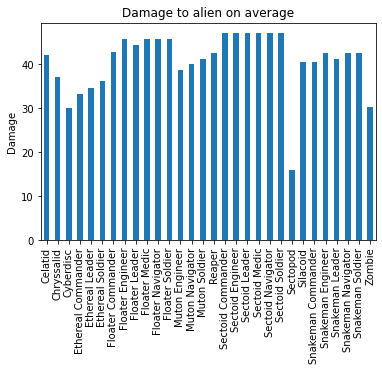

In [4]:
weapon_damages_graph = weapon_damages_aliens.groupby(["alien"]).mean()
ax = weapon_damages_graph.plot.bar(title="Damage to alien on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Hits to Kill

In [5]:
hits_to_kill_average = weapon_data_aliens[["alien", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["alien"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

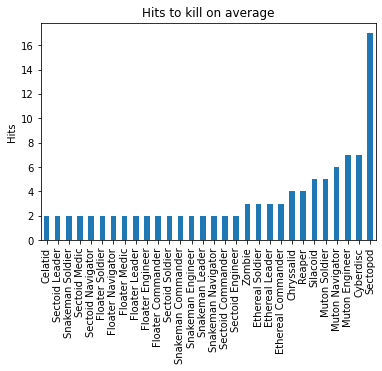

In [6]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Armor

In [7]:
armor_average = weapon_data_aliens[["alien", "armor"]]
armor_average = armor_average.groupby(["alien"]).mean()
armor_average = armor_average.sort_values(by=["armor"])

Text(0, 0.5, 'Armor')

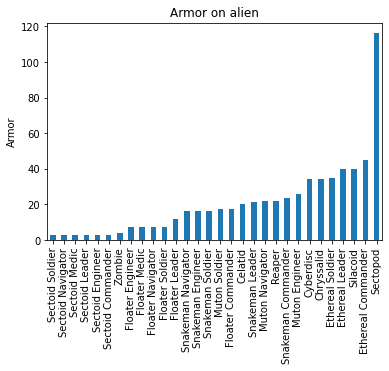

In [8]:
ax = armor_average.plot.bar(title="Armor on alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Armor")

## Weapons vs Aliens

### Kinetic Weapons

In [9]:
weapon_damages = weapon_damages_alien_targets.loc[ ["pistol", "rifle", "heavy_cannon", "auto_cannon"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

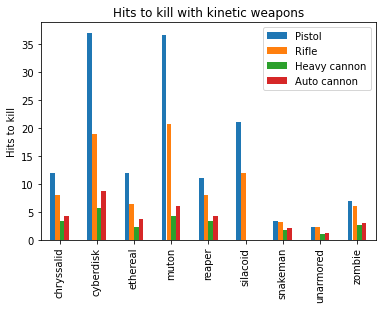

In [10]:
ax = weapon_damages.plot.bar(title="Hits to kill with kinetic weapons")
ax.legend(["Pistol", "Rifle", "Heavy cannon", "Auto cannon"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Melee

In [11]:
weapon_damages = weapon_damages_alien_targets.loc[ ["stun_rod"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

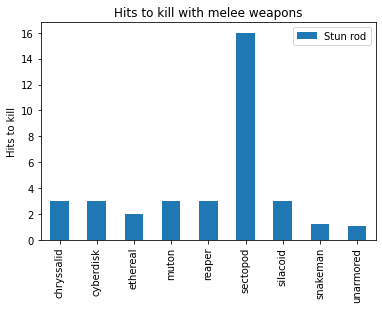

In [12]:
ax = weapon_damages.plot.bar(title="Hits to kill with melee weapons")
ax.legend(["Stun rod"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Explosive

In [13]:
weapon_damages = weapon_damages_alien_targets.loc[ ["rocket_launcher", "blaster_launcher", "small_launcher"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

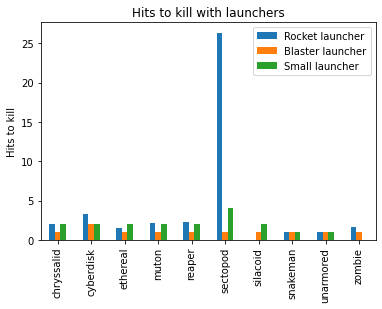

In [14]:
ax = weapon_damages.plot.bar(title="Hits to kill with launchers")
ax.legend(["Rocket launcher", "Blaster launcher", "Small launcher"]);
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Laser

In [15]:
weapon_damages = weapon_damages_alien_targets.loc[ ["laser_pistol", "laser_rifle", "heavy_laser"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

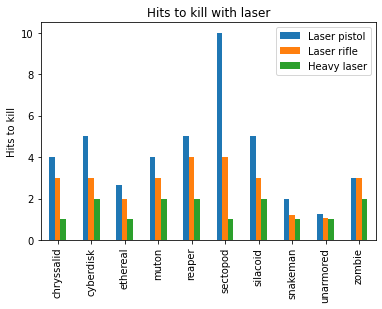

In [16]:
ax = weapon_damages.plot.bar(title="Hits to kill with laser")
ax.legend(["Laser pistol", "Laser rifle", "Heavy laser"]);
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Plasma

In [17]:
weapon_damages = weapon_damages_alien_targets.loc[ ["plasma_pistol", "plasma_rifle", "heavy_plasma"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

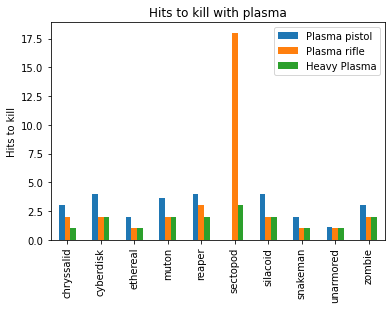

In [18]:
ax = weapon_damages.plot.bar(title="Hits to kill with plasma")
ax.legend(["Plasma pistol", "Plasma rifle", "Heavy Plasma"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Tank

In [19]:
weapon_damages = weapon_damages_alien_targets.loc[ ["cannon_turret", "rocket_turret", "laser_turret", "plasma_turret", "fusion_turret"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

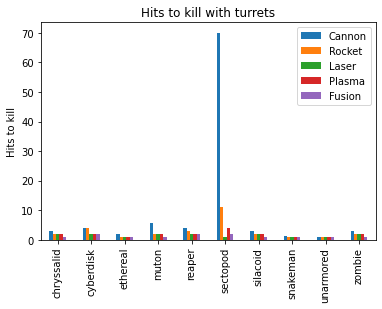

In [20]:
ax = weapon_damages.plot.bar(title="Hits to kill with turrets")
ax.legend(["Cannon", "Rocket", "Laser", "Plasma", "Fusion"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")